# TensorFlow

## base

### constant

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13568502397226627922, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3180960153
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18407900452792680115
 physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"]

上記は、Tensorflow 1.7.1での実行結果、今回は最終的に下記1.9.0にて実行。

In [1]:
import tensorflow as tf
print(tf.__version__)

C:\Users\yoshi\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yoshi\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yoshi\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yoshi\AppData\Roaming\Python\Python36\site-

1.9.0


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11185726042473951366]

In [3]:
import tensorflow as tf
import numpy as np

# それぞれ定数を定義
a = tf.constant(1)
b = tf.constant(2, dtype=tf.float32, shape=[3,2])
c = tf.constant(np.arange(4), dtype=tf.float32, shape=[2,2])

print('a:', a)
print('b:', b)
print('c:', c)

a: Tensor("Const_2:0", shape=(), dtype=int32)
b: Tensor("Const_3:0", shape=(3, 2), dtype=float32)
c: Tensor("Const_4:0", shape=(2, 2), dtype=float32)


https://qiita.com/ymfj/items/3822bcb1e26acedaed08

In [4]:
# それぞれ定数を定義
a = tf.constant(1)
b = tf.constant(2, dtype=tf.float32, shape=[3,2])
c = tf.constant(np.arange(4), dtype=tf.float32, shape=[2,2])

print('a:', a)
print('b:', b)
print('c:', c)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

config = tf.ConfigProto(
    gpu_options=tf.GPUOptions(
        visible_device_list="0", # specify GPU number
        allow_growth=True
    )
)
sess = tf.Session(config=config)

a: Tensor("Const_5:0", shape=(), dtype=int32)
b: Tensor("Const_6:0", shape=(3, 2), dtype=float32)
c: Tensor("Const_7:0", shape=(2, 2), dtype=float32)


In [ ]:
#sess = tf.Session()

In [6]:
print('a:', sess.run(a))
print('b:', sess.run(b))
print('c:', sess.run(c))

a: 1
b: [[2. 2.]
 [2. 2.]
 [2. 2.]]
c: [[0. 1.]
 [2. 3.]]


### placeholder

In [7]:
import tensorflow as tf
import numpy as np

# プレースホルダーを定義
x = tf.placeholder(dtype=tf.float32, shape=[None,3])

print('x:', x)

sess = tf.Session()

X = np.random.rand(2,3)
print('X:', X)

# プレースホルダにX[0]を入力
# shapeを(3,)から(1,3)にするためreshape
print('x:', sess.run(x, feed_dict={x:X[0].reshape(1,-1)}))
# プレースホルダにX[1]を入力
print('x:', sess.run(x, feed_dict={x:X[1].reshape(1,-1)}))

x: Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
X: [[0.51686416 0.27398234 0.67263218]
 [0.27885769 0.30903556 0.83410887]]
x: [[0.5168642  0.27398235 0.67263216]]
x: [[0.27885768 0.30903557 0.8341089 ]]


### variables

In [8]:
# 定数を定義
a = tf.constant(10)
print('a:', a)
# 変数を定義
x = tf.Variable(1)
print('x:', x)

calc_op = x * a

# xの値を更新
update_x = tf.assign(x, calc_op)

sess = tf.Session()

# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

a: Tensor("Const_8:0", shape=(), dtype=int32)
x: <tf.Variable 'Variable:0' shape=() dtype=int32_ref>
1
10
100


## 線形回帰
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 10. 誤差 = 0.29497215
Generation: 20. 誤差 = 0.22309925
Generation: 30. 誤差 = 0.19696972
Generation: 40. 誤差 = 0.17695074
Generation: 50. 誤差 = 0.16154276
Generation: 60. 誤差 = 0.14968348
Generation: 70. 誤差 = 0.1405556
Generation: 80. 誤差 = 0.13353002
Generation: 90. 誤差 = 0.12812252
Generation: 100. 誤差 = 0.1239605
Generation: 110. 誤差 = 0.12075704
Generation: 120. 誤差 = 0.11829137
Generation: 130. 誤差 = 0.116393596
Generation: 140. 誤差 = 0.114932925
Generation: 150. 誤差 = 0.11380867
Generation: 160. 誤差 = 0.11294332
Generation: 170. 誤差 = 0.11227729
Generation: 180. 誤差 = 0.11176463
Generation: 190. 誤差 = 0.11137008
Generation: 200. 誤差 = 0.111066386
Generation: 210. 誤差 = 0.110832654
Generation: 220. 誤差 = 0.11065273
Generation: 230. 誤差 = 0.110514276
Generation: 240. 誤差 = 0.11040769
Generation: 250. 誤差 = 0.11032565
Generation: 260. 誤差 = 0.110262506
Generation: 270. 誤差 = 0.110213906
Generation: 280. 誤差 = 0.11017649
Generation: 290. 誤差 = 0.110147715
Generation: 300. 誤差 = 0.110125534
[2.9169047]


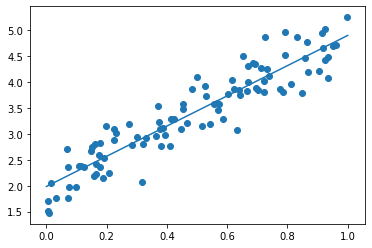

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 3 * x + 2

# ノイズを加える
noise = 0.3
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

### [try]
-  noiseの値を変更しよう
-  dの数値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 10. 誤差 = 0.517785
Generation: 20. 誤差 = 0.456289
Generation: 30. 誤差 = 0.4341687
Generation: 40. 誤差 = 0.41691455
Generation: 50. 誤差 = 0.40340576
Generation: 60. 誤差 = 0.3928293
Generation: 70. 誤差 = 0.38454854
Generation: 80. 誤差 = 0.37806526
Generation: 90. 誤差 = 0.37298924
Generation: 100. 誤差 = 0.3690151
Generation: 110. 誤差 = 0.3659036
Generation: 120. 誤差 = 0.36346745
Generation: 130. 誤差 = 0.3615601
Generation: 140. 誤差 = 0.3600668
Generation: 150. 誤差 = 0.35889763
Generation: 160. 誤差 = 0.3579822
Generation: 170. 誤差 = 0.35726547
Generation: 180. 誤差 = 0.3567044
Generation: 190. 誤差 = 0.35626507
Generation: 200. 誤差 = 0.3559211
Generation: 210. 誤差 = 0.35565183
Generation: 220. 誤差 = 0.35544097
Generation: 230. 誤差 = 0.35527584
Generation: 240. 誤差 = 0.35514665
Generation: 250. 誤差 = 0.35504547
Generation: 260. 誤差 = 0.35496616
Generation: 270. 誤差 = 0.35490417
Generation: 280. 誤差 = 0.35485566
Generation: 290. 誤差 = 0.35481763
Generation: 300. 誤差 = 0.35478783
[2.9813547]
[2.0256977]


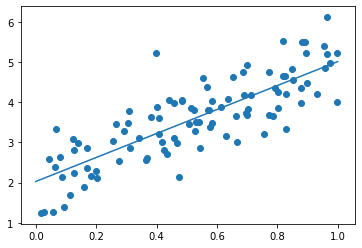

In [22]:
# データを生成
n = 100
x = np.random.rand(n)
d = 3 * x + 2
# ノイズを加える
#noise = 0.3
noise = 0.6
d = d + noise * np.random.randn(n) 

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10






# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

Generation: 10. 誤差 = 1.6492608
Generation: 20. 誤差 = 1.1210574
Generation: 30. 誤差 = 0.93162084
Generation: 40. 誤差 = 0.7910389
Generation: 50. 誤差 = 0.68632054
Generation: 60. 誤差 = 0.60831594
Generation: 70. 誤差 = 0.5502102
Generation: 80. 誤差 = 0.50692725
Generation: 90. 誤差 = 0.47468552
Generation: 100. 誤差 = 0.45066872
Generation: 110. 誤差 = 0.43277866
Generation: 120. 誤差 = 0.4194523
Generation: 130. 誤差 = 0.40952542
Generation: 140. 誤差 = 0.4021309
Generation: 150. 誤差 = 0.3966228
Generation: 160. 誤差 = 0.3925198
Generation: 170. 誤差 = 0.38946334
Generation: 180. 誤差 = 0.3871867
Generation: 190. 誤差 = 0.3854908
Generation: 200. 誤差 = 0.38422745
Generation: 210. 誤差 = 0.38328645
Generation: 220. 誤差 = 0.3825855
Generation: 230. 誤差 = 0.38206336
Generation: 240. 誤差 = 0.38167432
Generation: 250. 誤差 = 0.38138467
Generation: 260. 誤差 = 0.38116887
Generation: 270. 誤差 = 0.38100812
Generation: 280. 誤差 = 0.38088828
Generation: 290. 誤差 = 0.3807991
Generation: 300. 誤差 = 0.38073272
[0.73336697]
[9.989156]


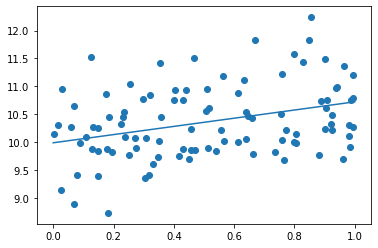

In [27]:
# データを生成
n = 100
x = np.random.rand(n)
#d = 3 * x + 2
d = 0.5 * x + 10


# ノイズを加える
#noise = 0.3
noise = 0.6
d = d + noise * np.random.randn(n) 


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10






# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

Generation: 10. 誤差 = 1.2256297
Generation: 20. 誤差 = 0.7503615
Generation: 30. 誤差 = 0.5864433
Generation: 40. 誤差 = 0.45919192
Generation: 50. 誤差 = 0.35999668
Generation: 60. 誤差 = 0.28267077
Generation: 70. 誤差 = 0.22239263
Generation: 80. 誤差 = 0.17540379
Generation: 90. 誤差 = 0.13877471
Generation: 100. 誤差 = 0.11022108
Generation: 110. 誤差 = 0.087962605
Generation: 120. 誤差 = 0.07061137
Generation: 130. 誤差 = 0.05708561
Generation: 140. 誤差 = 0.046541743
Generation: 150. 誤差 = 0.03832251
Generation: 160. 誤差 = 0.03191531
Generation: 170. 誤差 = 0.026920667
Generation: 180. 誤差 = 0.02302716
Generation: 190. 誤差 = 0.019992096
Generation: 200. 誤差 = 0.017626185
Generation: 210. 誤差 = 0.01578188
Generation: 220. 誤差 = 0.014344167
Generation: 230. 誤差 = 0.013223417
Generation: 240. 誤差 = 0.012349758
Generation: 250. 誤差 = 0.011668691
Generation: 260. 誤差 = 0.0111377975
Generation: 270. 誤差 = 0.010723956
Generation: 280. 誤差 = 0.010401354
Generation: 290. 誤差 = 0.010149872
Generation: 300. 誤差 = 0.009953828
[0.5836

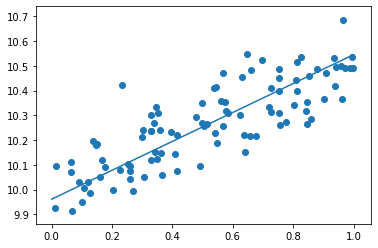

In [29]:
# データを生成
n = 100
x = np.random.rand(n)
#d = 3 * x + 2
d = 0.5 * x + 10

# ノイズを加える
noise = 0.1
#noise = 0.6
d = d + noise * np.random.randn(n) 


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 300
plot_interval = 10






# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

## 非線形回帰
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 100. 誤差 = 26.535686
Generation: 200. 誤差 = 22.285416
Generation: 300. 誤差 = 18.602716
Generation: 400. 誤差 = 15.434117
Generation: 500. 誤差 = 12.728207
Generation: 600. 誤差 = 10.43572
Generation: 700. 誤差 = 8.509687
Generation: 800. 誤差 = 6.9056153
Generation: 900. 誤差 = 5.5817127
Generation: 1000. 誤差 = 4.4991226
Generation: 1100. 誤差 = 3.6221347
Generation: 1200. 誤差 = 2.9183683
Generation: 1300. 誤差 = 2.3588777
Generation: 1400. 誤差 = 1.9181755
Generation: 1500. 誤差 = 1.5741626
Generation: 1600. 誤差 = 1.3079591
Generation: 1700. 誤差 = 1.1036615
Generation: 1800. 誤差 = 0.9480504
Generation: 1900. 誤差 = 0.8302647
Generation: 2000. 誤差 = 0.74147415
Generation: 2100. 誤差 = 0.674585
Generation: 2200. 誤差 = 0.6239608
Generation: 2300. 誤差 = 0.5851813
Generation: 2400. 誤差 = 0.5548332
Generation: 2500. 誤差 = 0.53033096
Generation: 2600. 誤差 = 0.5097567
Generation: 2700. 誤差 = 0.49172446
Generation: 2800. 誤差 = 0.4752624
Generation: 2900. 誤差 = 0.45971105
Generation: 3000. 誤差 = 0.44463992
Generation: 3100.

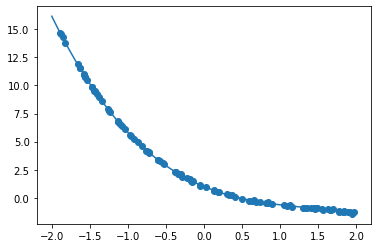

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.05
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

### [try]
-  noiseの値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 100. 誤差 = 29.87788
Generation: 200. 誤差 = 25.052246
Generation: 300. 誤差 = 20.872164
Generation: 400. 誤差 = 17.278074
Generation: 500. 誤差 = 14.212589
Generation: 600. 誤差 = 11.620537
Generation: 700. 誤差 = 9.4490795
Generation: 800. 誤差 = 7.647866
Generation: 900. 誤差 = 6.1692767
Generation: 1000. 誤差 = 4.968685
Generation: 1100. 誤差 = 4.0047026
Generation: 1200. 誤差 = 3.2394636
Generation: 1300. 誤差 = 2.6388443
Generation: 1400. 誤差 = 2.1726005
Generation: 1500. 誤差 = 1.8144118
Generation: 1600. 誤差 = 1.5418181
Generation: 1700. 誤差 = 1.3360314
Generation: 1800. 誤差 = 1.1816478
Generation: 1900. 誤差 = 1.0662656
Generation: 2000. 誤差 = 0.9800961
Generation: 2100. 誤差 = 0.91551995
Generation: 2200. 誤差 = 0.8666966
Generation: 2300. 誤差 = 0.82920325
Generation: 2400. 誤差 = 0.79972726
Generation: 2500. 誤差 = 0.77581465
Generation: 2600. 誤差 = 0.75567
Generation: 2700. 誤差 = 0.7379952
Generation: 2800. 誤差 = 0.7218707
Generation: 2900. 誤差 = 0.70665824
Generation: 3000. 誤差 = 0.691927
Generation: 3100. 誤差

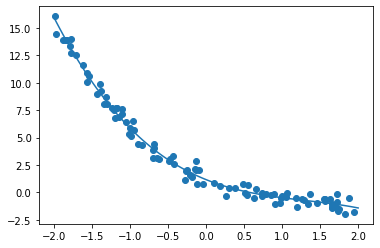

In [32]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
#noise = 0.05
noise = 0.50
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

### [try]
-  dの数値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 100. 誤差 = 11.446877
Generation: 200. 誤差 = 9.629941
Generation: 300. 誤差 = 8.159211
Generation: 400. 誤差 = 6.952107
Generation: 500. 誤差 = 5.9433794
Generation: 600. 誤差 = 5.0869756
Generation: 700. 誤差 = 4.352976
Generation: 800. 誤差 = 3.7220745
Generation: 900. 誤差 = 3.1806836
Generation: 1000. 誤差 = 2.717947
Generation: 1100. 誤差 = 2.3243568
Generation: 1200. 誤差 = 1.9912436
Generation: 1300. 誤差 = 1.710609
Generation: 1400. 誤差 = 1.4750861
Generation: 1500. 誤差 = 1.2779434
Generation: 1600. 誤差 = 1.1130872
Generation: 1700. 誤差 = 0.9750874
Generation: 1800. 誤差 = 0.8591622
Generation: 1900. 誤差 = 0.761184
Generation: 2000. 誤差 = 0.6776565
Generation: 2100. 誤差 = 0.6056849
Generation: 2200. 誤差 = 0.5429212
Generation: 2300. 誤差 = 0.48751175
Generation: 2400. 誤差 = 0.43802667
Generation: 2500. 誤差 = 0.3933909
Generation: 2600. 誤差 = 0.35281578
Generation: 2700. 誤差 = 0.31573197
Generation: 2800. 誤差 = 0.2817352
Generation: 2900. 誤差 = 0.25053662
Generation: 3000. 誤差 = 0.22192703
Generation: 3100. 誤差

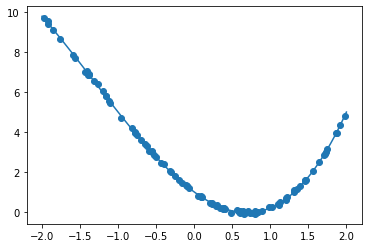

In [33]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
#d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1
d =  0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1

#  ノイズを加える
noise = 0.05
#noise = 0.50
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  次の式をモデルとして回帰を行おう
$$ y=30x^{2} +0.5x+0.2 $$<br>

Generation: 100. 誤差 = 2786.0305
Generation: 200. 誤差 = 2746.955
Generation: 300. 誤差 = 2708.7024
Generation: 400. 誤差 = 2671.2502
Generation: 500. 誤差 = 2634.5774
Generation: 600. 誤差 = 2598.6616
Generation: 700. 誤差 = 2563.4832
Generation: 800. 誤差 = 2529.0222
Generation: 900. 誤差 = 2495.2598
Generation: 1000. 誤差 = 2462.1772
Generation: 1100. 誤差 = 2429.758
Generation: 1200. 誤差 = 2397.9836
Generation: 1300. 誤差 = 2366.8384
Generation: 1400. 誤差 = 2336.3066
Generation: 1500. 誤差 = 2306.3723
Generation: 1600. 誤差 = 2277.0205
Generation: 1700. 誤差 = 2248.2368
Generation: 1800. 誤差 = 2220.0066
Generation: 1900. 誤差 = 2192.3164
Generation: 2000. 誤差 = 2165.1528
Generation: 2100. 誤差 = 2138.503
Generation: 2200. 誤差 = 2112.353
Generation: 2300. 誤差 = 2086.6907
Generation: 2400. 誤差 = 2061.5037
Generation: 2500. 誤差 = 2036.7792
Generation: 2600. 誤差 = 2012.5054
Generation: 2700. 誤差 = 1988.6697
Generation: 2800. 誤差 = 1965.261
Generation: 2900. 誤差 = 1942.266
Generation: 3000. 誤差 = 1919.6735
Generation: 3100. 誤差 = 18

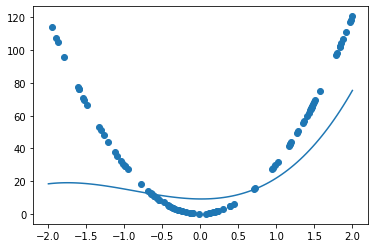

In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

iters_num = 10000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
#d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1
d =  30 * x ** 2 + 0.5 * x + 0.2

#  ノイズを加える
noise = 0.05
#noise = 0.50
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

## [try]
-  誤差が収束するようiters_numやlearning_rateを調整しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 100. 誤差 = 2355.5723
Generation: 200. 誤差 = 2331.1086
Generation: 300. 誤差 = 2306.9065
Generation: 400. 誤差 = 2282.9556
Generation: 500. 誤差 = 2259.2478
Generation: 600. 誤差 = 2235.776
Generation: 700. 誤差 = 2212.5325
Generation: 800. 誤差 = 2189.512
Generation: 900. 誤差 = 2166.7078
Generation: 1000. 誤差 = 2144.1147
Generation: 1100. 誤差 = 2121.728
Generation: 1200. 誤差 = 2099.5422
Generation: 1300. 誤差 = 2077.5535
Generation: 1400. 誤差 = 2055.757
Generation: 1500. 誤差 = 2034.149
Generation: 1600. 誤差 = 2012.7255
Generation: 1700. 誤差 = 1991.4828
Generation: 1800. 誤差 = 1970.4176
Generation: 1900. 誤差 = 1949.5262
Generation: 2000. 誤差 = 1928.8062
Generation: 2100. 誤差 = 1908.2538
Generation: 2200. 誤差 = 1887.8667
Generation: 2300. 誤差 = 1867.6421
Generation: 2400. 誤差 = 1847.578
Generation: 2500. 誤差 = 1827.6709
Generation: 2600. 誤差 = 1807.9197
Generation: 2700. 誤差 = 1788.3215
Generation: 2800. 誤差 = 1768.8749
Generation: 2900. 誤差 = 1749.5776
Generation: 3000. 誤差 = 1730.428
Generation: 3100. 誤差 = 171

Generation: 24800. 誤差 = 64.62414
Generation: 24900. 誤差 = 63.192154
Generation: 25000. 誤差 = 61.779144
Generation: 25100. 誤差 = 60.384502
Generation: 25200. 誤差 = 59.00808
Generation: 25300. 誤差 = 57.64988
Generation: 25400. 誤差 = 56.31047
Generation: 25500. 誤差 = 54.98938
Generation: 25600. 誤差 = 53.686504
Generation: 25700. 誤差 = 52.401817
Generation: 25800. 誤差 = 51.135323
Generation: 25900. 誤差 = 49.886982
Generation: 26000. 誤差 = 48.656796
Generation: 26100. 誤差 = 47.44479
Generation: 26200. 誤差 = 46.25089
Generation: 26300. 誤差 = 45.07495
Generation: 26400. 誤差 = 43.916943
Generation: 26500. 誤差 = 42.776817
Generation: 26600. 誤差 = 41.65454
Generation: 26700. 誤差 = 40.55012
Generation: 26800. 誤差 = 39.4634
Generation: 26900. 誤差 = 38.394337
Generation: 27000. 誤差 = 37.342842
Generation: 27100. 誤差 = 36.308834
Generation: 27200. 誤差 = 35.292217
Generation: 27300. 誤差 = 34.293118
Generation: 27400. 誤差 = 33.311382
Generation: 27500. 誤差 = 32.3468
Generation: 27600. 誤差 = 31.399317
Generation: 27700. 誤差 = 30.4

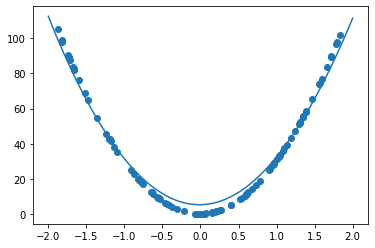

In [35]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#iters_num = 10000
iters_num = 30000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
#d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1
d =  30 * x ** 2 + 0.5 * x + 0.2

#  ノイズを加える
noise = 0.05
#noise = 0.50
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

Generation: 100. 誤差 = 2593.7546
Generation: 200. 誤差 = 2264.5566
Generation: 300. 誤差 = 1999.3441
Generation: 400. 誤差 = 1782.4038
Generation: 500. 誤差 = 1600.1205
Generation: 600. 誤差 = 1442.0044
Generation: 700. 誤差 = 1301.0249
Generation: 800. 誤差 = 1173.1089
Generation: 900. 誤差 = 1056.1667
Generation: 1000. 誤差 = 949.1633
Generation: 1100. 誤差 = 851.5037
Generation: 1200. 誤差 = 762.72327
Generation: 1300. 誤差 = 682.37024
Generation: 1400. 誤差 = 609.9737
Generation: 1500. 誤差 = 545.0453
Generation: 1600. 誤差 = 487.07523
Generation: 1700. 誤差 = 435.5547
Generation: 1800. 誤差 = 389.9706
Generation: 1900. 誤差 = 349.8128
Generation: 2000. 誤差 = 314.57935
Generation: 2100. 誤差 = 283.77954
Generation: 2200. 誤差 = 256.9375
Generation: 2300. 誤差 = 233.59584
Generation: 2400. 誤差 = 213.31876
Generation: 2500. 誤差 = 195.69644
Generation: 2600. 誤差 = 180.34729
Generation: 2700. 誤差 = 166.92029
Generation: 2800. 誤差 = 155.09843
Generation: 2900. 誤差 = 144.59982
Generation: 3000. 誤差 = 135.17805
Generation: 3100. 誤差 = 126.

Generation: 23600. 誤差 = 0.002132467
Generation: 23700. 誤差 = 0.0021193945
Generation: 23800. 誤差 = 0.002119482
Generation: 23900. 誤差 = 0.0021194115
Generation: 24000. 誤差 = 0.0021195188
Generation: 24100. 誤差 = 0.0021194064
Generation: 24200. 誤差 = 0.0021200262
Generation: 24300. 誤差 = 0.0021194099
Generation: 24400. 誤差 = 0.0021194376
Generation: 24500. 誤差 = 0.0021194434
Generation: 24600. 誤差 = 0.0021213337
Generation: 24700. 誤差 = 0.002119454
Generation: 24800. 誤差 = 0.0021194564
Generation: 24900. 誤差 = 0.0021194275
Generation: 25000. 誤差 = 0.0021196278
Generation: 25100. 誤差 = 0.0021194972
Generation: 25200. 誤差 = 0.002119425
Generation: 25300. 誤差 = 0.002126948
Generation: 25400. 誤差 = 0.0021194238
Generation: 25500. 誤差 = 0.0021236653
Generation: 25600. 誤差 = 0.0021193707
Generation: 25700. 誤差 = 0.0021201847
Generation: 25800. 誤差 = 0.0021194178
Generation: 25900. 誤差 = 0.0021194436
Generation: 26000. 誤差 = 0.0021310798
Generation: 26100. 誤差 = 0.0021193968
Generation: 26200. 誤差 = 0.0021206792
Genera

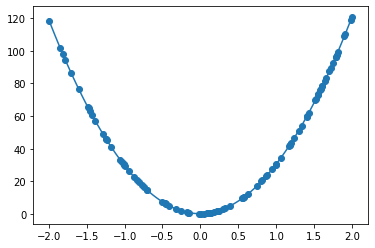

In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#iters_num = 10000
iters_num = 30000
plot_interval = 100

# データを生成
n=100
x = np.random.rand(n).astype(np.float32) * 4 - 2
#d =  - 0.4 * x ** 3 + 1.6 * x ** 2 - 2.8 * x + 1
d =  30 * x ** 2 + 0.5 * x + 0.2

#  ノイズを加える
noise = 0.05
#noise = 0.50
d = d + noise * np.random.randn(n) 

# モデル
# bを使っていないことに注意.
xt = tf.placeholder(tf.float32, [None, 4])
dt = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_normal([4, 1], stddev=0.01))
y = tf.matmul(xt,W)

# 誤差関数 平均２乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
#optimizer = tf.train.AdamOptimizer(0.001)
optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss, )

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
d_train = d.reshape(-1,1)
x_train = np.zeros([n, 4])
for i in range(n):
    for j in range(4):
        x_train[i, j] = x[i]**j

#  トレーニング
for i in range(iters_num):
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, dt:d_train}) 
        W_val = sess.run(W)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))
    sess.run(train, feed_dict={xt:x_train,dt:d_train})

print(W_val[::-1])
    
# 予測関数
def predict(x):
    result = 0.
    for i in range(0,4):
        result += W_val[i,0] * x ** i
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x ,d)
linex = np.linspace(-2,2,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

## 分類1層 (mnist)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try]
-  x：入力値, d：教師データ, W：重み, b：バイアス をそれぞれ定義しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
[False False False ... False False False]
Generation: 1. 正解率 = 0.2149
[False False  True ... False False False]
Generation: 2. 正解率 = 0.3632
[ True False  True ... False False False]
Generation: 3. 正解率 = 0.4279
[ True False  True ... False False  True]
Generation: 4. 正解率 = 0.631
[ True  True  True ...

Generation: 90. 正解率 = 0.8704
[ True  True  True ...  True False  True]
Generation: 91. 正解率 = 0.8672
[ True  True  True ...  True False  True]
Generation: 92. 正解率 = 0.873
[ True  True  True ...  True False  True]
Generation: 93. 正解率 = 0.869
[ True  True  True ...  True False  True]
Generation: 94. 正解率 = 0.8676
[ True  True  True ...  True False  True]
Generation: 95. 正解率 = 0.8722
[ True  True  True ...  True  True  True]
Generation: 96. 正解率 = 0.8742
[ True  True  True ...  True  True  True]
Generation: 97. 正解率 = 0.8708
[ True  True  True ...  True  True  True]
Generation: 98. 正解率 = 0.8693
[ True  True  True ...  True False  True]
Generation: 99. 正解率 = 0.8657
[ True  True  True ...  True False  True]
Generation: 100. 正解率 = 0.8608


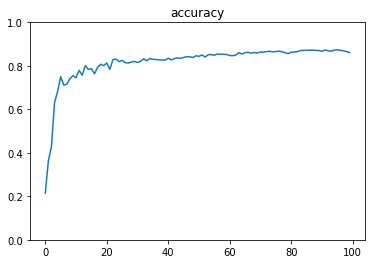

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 100
batch_size = 100
plot_interval = 1

# -------------- ここを補填 ------------------------
x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
# ------------------------------------------------------

y = tf.nn.softmax(tf.matmul(x, W) + b)

# 交差エントロピー
cross_entropy = -tf.reduce_sum(d * tf.log(y), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)
#train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 正誤を保存
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
# 正解率
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch})
    if (i+1) % plot_interval == 0:
        print(sess.run(correct, feed_dict={x: mnist.test.images, d: mnist.test.labels}))
        accuracy_val = sess.run(accuracy, feed_dict={x: mnist.test.images, d: mnist.test.labels})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()        

## 分類3層 (mnist)


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Generation: 100. 正解率 = 0.1135
Generation: 200. 正解率 = 0.3213
Generation: 300. 正解率 = 0.4287
Generation: 400. 正解率 = 0.5091
Generation: 500. 正解率 = 0.6037
Generation: 600. 正解率 = 0.6623
Generation: 700. 正解率 = 0.6817
Generation: 800. 正解率 = 0.7282
Generation: 900. 正解率 = 0.7497
Generation: 1000. 正解率 = 0.782
G

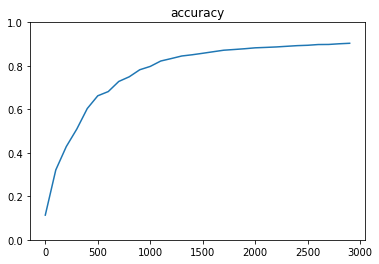

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.AdamOptimizer(1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

## [try]
-  隠れ層のサイズを変更してみよう

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1147
Generation: 200. 正解率 = 0.3902
Generation: 300. 正解率 = 0.5608
Generation: 400. 正解率 = 0.6852
Generation: 500. 正解率 = 0.733
Generation: 600. 正解率 = 0.787
Generation: 700. 正解率 = 0.8198
Generation: 800. 正解率 = 0.8356
Generation: 900. 正解率 = 0.8542
Generation: 1000. 正解率 = 0.8644
Generation: 1100. 正解率 = 0.8716
Generation: 1200. 正解率 = 0.8776
Generation: 1300. 正解率 = 0.8851
Generation: 1400. 正解率 = 0.8896
Generation: 1500. 正解率 = 0.8934
Generation: 1600. 正解率 = 0.8972
Generation: 1700. 正解率 = 0.9013
Generation: 1800. 正解率 = 0.9017
Generation: 1900. 正解率 = 0.9049
Generation: 2000. 正解率 = 0.9044
Generation: 2100. 正解率 = 0.9078
Generation: 2200. 正解率 = 0.9084
Generation: 2300. 正解率 = 0.9091
Generation: 2400. 正解率 = 0.9109
Generation: 2500. 正解率 = 0.9123
Generation: 2600. 正解率 = 0.913
Generation: 

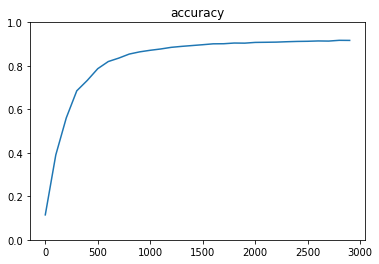

In [39]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

#hidden_layer_size_1 = 600
#hidden_layer_size_2 = 300

hidden_layer_size_1 = 1200
hidden_layer_size_2 = 600

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


optimizer = tf.train.AdamOptimizer(1e-4)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

## [try]
-  optimizerを変更しよう<br>

tf.train.GradientDescentOptimizer<br>
`__init__(
    learning_rate,
    use_locking=False,
    name='GradientDescent'
)`

tf.train.MomentumOptimizer<br>
`__init__(
    learning_rate,
    momentum,
    use_locking=False,
    name='Momentum',
    use_nesterov=False
)`

tf.train.AdagradOptimizer<br>
`__init__(
    learning_rate,
    initial_accumulator_value=0.1,
    use_locking=False,
    name='Adagrad'
)`

tf.train.RMSPropOptimizer<br>
`__init__(
    learning_rate,
    decay=0.9,
    momentum=0.0,
    epsilon=1e-10,
    use_locking=False,
    centered=False,
    name='RMSProp'
)`

tf.train.AdamOptimizer<br>
`__init__(
    learning_rate=0.001,
    beta1=0.9,
    beta2=0.999,
    epsilon=1e-08,
    use_locking=False,
    name='Adam'
)`

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1627
Generation: 200. 正解率 = 0.1219
Generation: 300. 正解率 = 0.1727
Generation: 400. 正解率 = 0.2833
Generation: 500. 正解率 = 0.2919
Generation: 600. 正解率 = 0.3748
Generation: 700. 正解率 = 0.4592
Generation: 800. 正解率 = 0.567
Generation: 900. 正解率 = 0.6217
Generation: 1000. 正解率 = 0.74
Generation: 1100. 正解率 = 0.7878
Generation: 1200. 正解率 = 0.8093
Generation: 1300. 正解率 = 0.8248
Generation: 1400. 正解率 = 0.8345
Generation: 1500. 正解率 = 0.8629
Generation: 1600. 正解率 = 0.8657
Generation: 1700. 正解率 = 0.8754
Generation: 1800. 正解率 = 0.8872
Generation: 1900. 正解率 = 0.8902
Generation: 2000. 正解率 = 0.8933
Generation: 2100. 正解率 = 0.8906
Generation: 2200. 正解率 = 0.8916
Generation: 2300. 正解率 = 0.9009
Generation: 2400. 正解率 = 0.8973
Generation: 2500. 正解率 = 0.9064
Generation: 2600. 正解率 = 0.9055
Generation: 

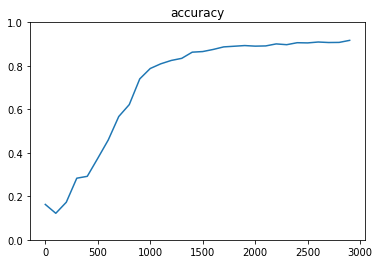

In [42]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


#optimizer = tf.train.AdamOptimizer(1e-4)
optimizer = tf.train.GradientDescentOptimizer(0.5)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1032
Generation: 200. 正解率 = 0.1833
Generation: 300. 正解率 = 0.4842
Generation: 400. 正解率 = 0.7148
Generation: 500. 正解率 = 0.7989
Generation: 600. 正解率 = 0.844
Generation: 700. 正解率 = 0.8763
Generation: 800. 正解率 = 0.872
Generation: 900. 正解率 = 0.8918
Generation: 1000. 正解率 = 0.8925
Generation: 1100. 正解率 = 0.9032
Generation: 1200. 正解率 = 0.9068
Generation: 1300. 正解率 = 0.9098
Generation: 1400. 正解率 = 0.9141
Generation: 1500. 正解率 = 0.9163
Generation: 1600. 正解率 = 0.9139
Generation: 1700. 正解率 = 0.9215
Generation: 1800. 正解率 = 0.9215
Generation: 1900. 正解率 = 0.928
Generation: 2000. 正解率 = 0.9299
Generation: 2100. 正解率 = 0.9339
Generation: 2200. 正解率 = 0.9313
Generation: 2300. 正解率 = 0.9326
Generation: 2400. 正解率 = 0.9333
Generation: 2500. 正解率 = 0.937
Generation: 2600. 正解率 = 0.9396
Generation: 2

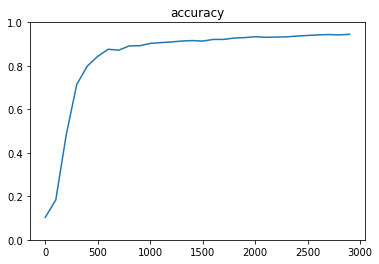

In [43]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


#optimizer = tf.train.AdamOptimizer(1e-4)
optimizer = tf.train.MomentumOptimizer(0.1,0.9)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.1135
Generation: 200. 正解率 = 0.1032
Generation: 300. 正解率 = 0.1135
Generation: 400. 正解率 = 0.0982
Generation: 500. 正解率 = 0.1743
Generation: 600. 正解率 = 0.2606
Generation: 700. 正解率 = 0.3962
Generation: 800. 正解率 = 0.5068
Generation: 900. 正解率 = 0.6493
Generation: 1000. 正解率 = 0.7059
Generation: 1100. 正解率 = 0.7405
Generation: 1200. 正解率 = 0.7682
Generation: 1300. 正解率 = 0.7883
Generation: 1400. 正解率 = 0.8155
Generation: 1500. 正解率 = 0.8298
Generation: 1600. 正解率 = 0.838
Generation: 1700. 正解率 = 0.8487
Generation: 1800. 正解率 = 0.8553
Generation: 1900. 正解率 = 0.8549
Generation: 2000. 正解率 = 0.8636
Generation: 2100. 正解率 = 0.8732
Generation: 2200. 正解率 = 0.8735
Generation: 2300. 正解率 = 0.8782
Generation: 2400. 正解率 = 0.8843
Generation: 2500. 正解率 = 0.8858
Generation: 2600. 正解率 = 0.8883
Generation

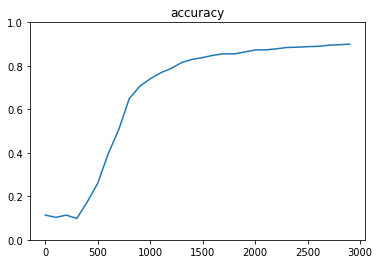

In [44]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


#optimizer = tf.train.AdamOptimizer(1e-4)
optimizer = tf.train.AdagradOptimizer(0.1)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 100. 正解率 = 0.101
Generation: 200. 正解率 = 0.1273
Generation: 300. 正解率 = 0.7337
Generation: 400. 正解率 = 0.8409
Generation: 500. 正解率 = 0.8809
Generation: 600. 正解率 = 0.8993
Generation: 700. 正解率 = 0.904
Generation: 800. 正解率 = 0.9133
Generation: 900. 正解率 = 0.9216
Generation: 1000. 正解率 = 0.927
Generation: 1100. 正解率 = 0.9291
Generation: 1200. 正解率 = 0.9353
Generation: 1300. 正解率 = 0.9419
Generation: 1400. 正解率 = 0.9453
Generation: 1500. 正解率 = 0.9467
Generation: 1600. 正解率 = 0.9481
Generation: 1700. 正解率 = 0.9483
Generation: 1800. 正解率 = 0.9531
Generation: 1900. 正解率 = 0.9525
Generation: 2000. 正解率 = 0.9553
Generation: 2100. 正解率 = 0.9558
Generation: 2200. 正解率 = 0.9605
Generation: 2300. 正解率 = 0.9604
Generation: 2400. 正解率 = 0.9631
Generation: 2500. 正解率 = 0.9605
Generation: 2600. 正解率 = 0.9617
Generation: 

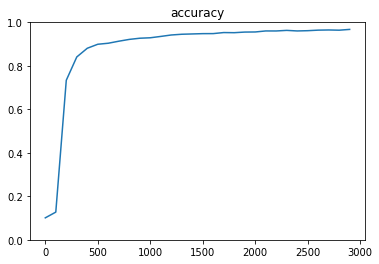

In [45]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

iters_num = 3000
batch_size = 100
plot_interval = 100

hidden_layer_size_1 = 600
hidden_layer_size_2 = 300

dropout_rate = 0.5

x = tf.placeholder(tf.float32, [None, 784])
d = tf.placeholder(tf.float32, [None, 10])
W1 = tf.Variable(tf.random_normal([784, hidden_layer_size_1], stddev=0.01))
W2 = tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2], stddev=0.01))
W3 = tf.Variable(tf.random_normal([hidden_layer_size_2, 10], stddev=0.01))

b1 = tf.Variable(tf.zeros([hidden_layer_size_1]))
b2 = tf.Variable(tf.zeros([hidden_layer_size_2]))
b3 = tf.Variable(tf.zeros([10]))

z1 = tf.sigmoid(tf.matmul(x, W1) + b1)
z2 = tf.sigmoid(tf.matmul(z1, W2) + b2)

keep_prob = tf.placeholder(tf.float32)
drop = tf.nn.dropout(z2, keep_prob)

y = tf.nn.softmax(tf.matmul(drop, W3) + b3)
loss = tf.reduce_mean(-tf.reduce_sum(d * tf.log(y), reduction_indices=[1]))


#optimizer = tf.train.AdamOptimizer(1e-4)
optimizer = tf.train.RMSPropOptimizer(0.001)

train = optimizer.minimize(loss)
correct = tf.equal(tf.argmax(y, 1), tf.argmax(d, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x:x_batch, d:d_batch, keep_prob:(1 - dropout_rate)})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:mnist.test.images, d:mnist.test.labels, keep_prob:1.0})            
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()            

## 分類CNN (mnist)
conv - relu - pool - conv - relu - pool - <br>
affin - relu - dropout - affin - softmax<br>

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import matplotlib.pyplot as plt

iters_num = 300
batch_size = 100
plot_interval = 10

dropout_rate = 0.5

# placeholder
x = tf.placeholder(tf.float32, shape=[None, 784])
d = tf.placeholder(tf.float32, shape=[None, 10])

# 画像を784の一次元から28x28の二次元に変換する
# 画像を28x28にreshape
x_image = tf.reshape(x, [-1,28,28,1])

# 第一層のweightsとbiasのvariable
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

# 第一層のconvolutionalとpool
# strides[0] = strides[3] = 1固定
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
# プーリングサイズ n*n にしたい場合 ksize=[1, n, n, 1]
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第二層
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第一層と第二層でreduceされてできた特徴に対してrelu
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 出来上がったものに対してSoftmax
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 交差エントロピー
loss = -tf.reduce_sum(d * tf.log(y_conv))

train = tf.train.AdamOptimizer(1e-4).minimize(loss)

correct = tf.equal(tf.argmax(y_conv,1), tf.argmax(d,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()




Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
sess = tf.Session()

In [6]:
sess.run(init)

Generation: 10. 正解率 = 0.68
Generation: 20. 正解率 = 0.56
Generation: 30. 正解率 = 0.87
Generation: 40. 正解率 = 0.82
Generation: 50. 正解率 = 0.87
Generation: 60. 正解率 = 0.87
Generation: 70. 正解率 = 0.92
Generation: 80. 正解率 = 0.87
Generation: 90. 正解率 = 0.87
Generation: 100. 正解率 = 0.89
Generation: 110. 正解率 = 0.88
Generation: 120. 正解率 = 0.91
Generation: 130. 正解率 = 0.94
Generation: 140. 正解率 = 0.9
Generation: 150. 正解率 = 0.9
Generation: 160. 正解率 = 0.93
Generation: 170. 正解率 = 0.95
Generation: 180. 正解率 = 0.91
Generation: 190. 正解率 = 0.92
Generation: 200. 正解率 = 0.94
Generation: 210. 正解率 = 0.91
Generation: 220. 正解率 = 0.91
Generation: 230. 正解率 = 0.94
Generation: 240. 正解率 = 0.92
Generation: 250. 正解率 = 0.93
Generation: 260. 正解率 = 0.92
Generation: 270. 正解率 = 0.91
Generation: 280. 正解率 = 0.88
Generation: 290. 正解率 = 0.93
Generation: 300. 正解率 = 0.95


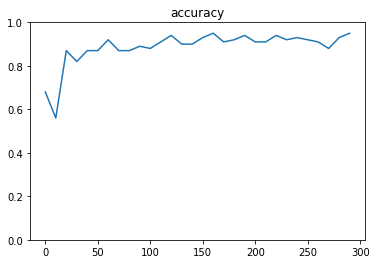

In [8]:
accuracies = []
for i in range(iters_num):
    #print(i)
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    #print(x_batch)
    sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob: 1-dropout_rate})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:x_batch, d: d_batch, keep_prob: 1.0})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show() 

### [try]
-  ドロップアウト率を0に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Generation: 10. 正解率 = 0.35
Generation: 20. 正解率 = 0.51
Generation: 30. 正解率 = 0.66
Generation: 40. 正解率 = 0.8
Generation: 50. 正解率 = 0.79
Generation: 60. 正解率 = 0.83
Generation: 70. 正解率 = 0.9
Generation: 80. 正解率 = 0.82
Generation: 90. 正解率 = 0.91
Generation: 100. 正解率 = 0.9
Generation: 110. 正解率 = 0.88
Generation: 120. 正解率 = 0.95
Generation: 130. 正解率 = 0.88
Generation: 140. 正解率 = 0.83
Generation: 150. 正解率 = 0.89
Generation: 160. 正解率 = 0.92
Generation: 170. 正解率 = 0.92
Generation: 180. 正解率 = 0.91
Generation: 190. 正解率 = 0.92
Generation: 200. 正解率 = 0.88
Generation: 210. 正解率 = 0.89
Generation: 220. 正解率 = 0.93
Generation: 230. 正解率 = 0.94
Generation: 240. 正解率 = 0.95
Generation: 250. 正解率 = 0.97
Generation: 260. 正解率 = 0.93
Generation: 270. 正解率 = 0.96
Generation: 280. 正解率 = 0.93
Generation: 290. 正解率 = 0.96
Genera

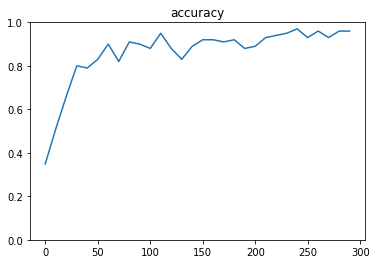

In [9]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import matplotlib.pyplot as plt

iters_num = 300
batch_size = 100
plot_interval = 10

#dropout_rate = 0.5
dropout_rate = 0

# placeholder
x = tf.placeholder(tf.float32, shape=[None, 784])
d = tf.placeholder(tf.float32, shape=[None, 10])

# 画像を784の一次元から28x28の二次元に変換する
# 画像を28x28にreshape
x_image = tf.reshape(x, [-1,28,28,1])

# 第一層のweightsとbiasのvariable
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

# 第一層のconvolutionalとpool
# strides[0] = strides[3] = 1固定
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
# プーリングサイズ n*n にしたい場合 ksize=[1, n, n, 1]
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第二層
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 第一層と第二層でreduceされてできた特徴に対してrelu
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 出来上がったものに対してSoftmax
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

# 交差エントロピー
loss = -tf.reduce_sum(d * tf.log(y_conv))

train = tf.train.AdamOptimizer(1e-4).minimize(loss)

correct = tf.equal(tf.argmax(y_conv,1), tf.argmax(d,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


accuracies = []
for i in range(iters_num):
    x_batch, d_batch = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={x: x_batch, d: d_batch, keep_prob: 1-dropout_rate})
    if (i+1) % plot_interval == 0:
        accuracy_val = sess.run(accuracy, feed_dict={x:x_batch, d: d_batch, keep_prob: 1.0})
        accuracies.append(accuracy_val)
        print('Generation: ' + str(i+1) + '. 正解率 = ' + str(accuracy_val))        
    
    
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies)
plt.title("accuracy")
plt.ylim(0, 1.0)
plt.show()                

# 考察
Tensorflowを使った様々なパターンの実装を、色々なケースでコードを修正することによって、単にコードを読むよりも理解を深めることができた。

過去の経験から、Tensorfow 1.7.1を使って、ローカル環境のGPUを認識させることはできていたが、MNISTデータの扱いが異なっておりWARNINGが表示され、そのこととの直接の関係は定かではないが、メモリ不足によりJupyter notebookのカーネルが停止する状況に見舞われた。
最終的には、requirements.txt記載のバージョンであるTensorflow 1.9.0を使い、ＣＰＵで学習させた。